# **Spam Email Detection**

Rui Chen Feb 2rd 


In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('/Users/ruichen/Documents/SFL Scientific/smsspamcollection')
import string

In [2]:
text = pd.read_table("smsspamcollection", header = None)

In [3]:
text =text.rename(columns={0:"label", 1:"text"})
text['num_resp'] = text.label.map({'ham':0, 'spam':1})

In [4]:
text.head(20)

,label,text,num_resp
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


**1. Explorative Data Analysis**

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
text.groupby("label").size()

label
ham     4825
spam     747
dtype: int64

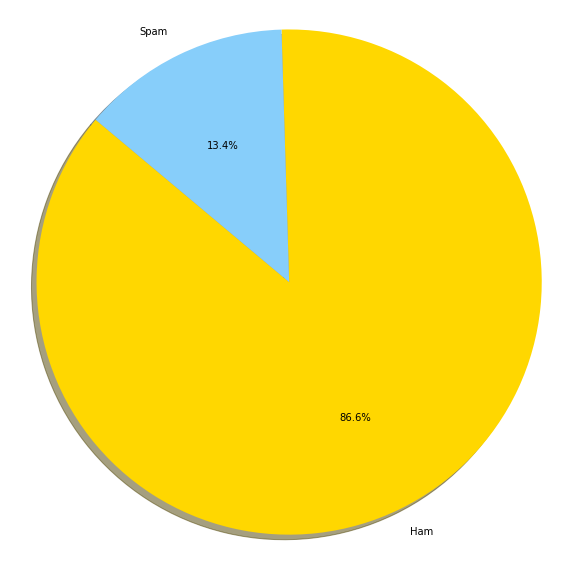

In [7]:
## Visualize the number of the ham and number of the spam:
import matplotlib.pyplot as plt
labels = 'Ham', 'Spam'
sizes = [4825, 747]
colors = ['gold', 'lightskyblue']
 
# Plot
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

We could see here ham email is much more than spam email so this dataset is pretty imbalanced.

 Check if there is any patterns in the length of text between the spam text and ham text

In [8]:
#text["text"] = text.apply(lambda row: row['text'].replace("'",""), axis = 1)


In [9]:
## remove numbers and then tokenize the text
text["tokenized"] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text["length"] = text.apply(lambda row: len(row['tokenized']), axis=1)


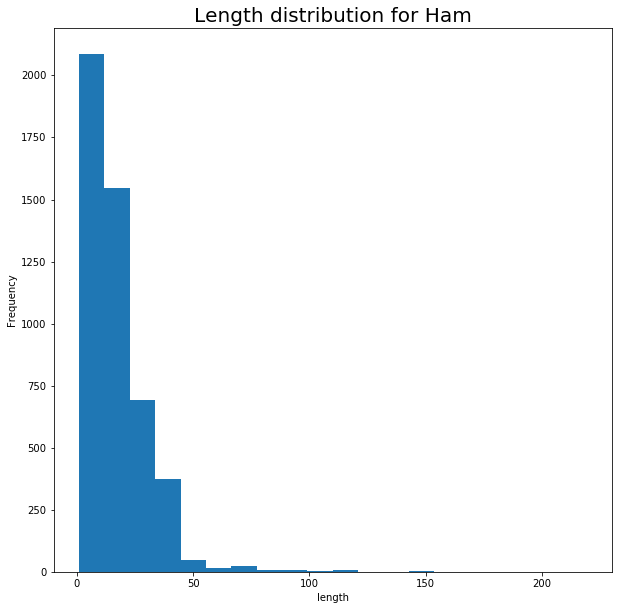

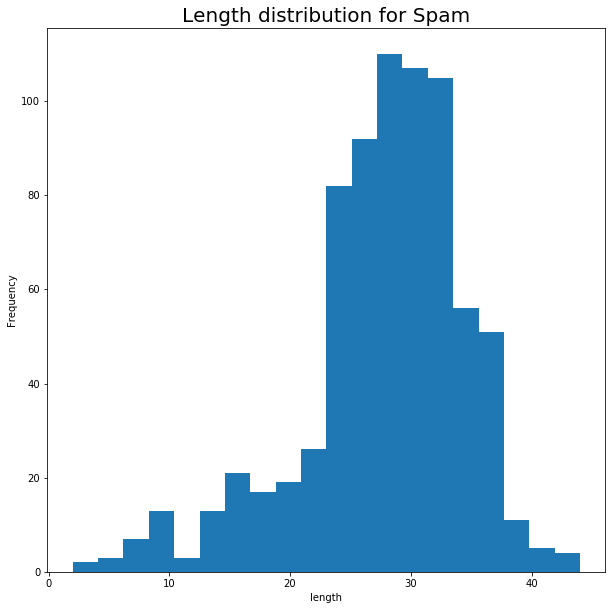

In [10]:
#ham_text.hist(column= "length", bins = 20)

#plt.show()
plt.figure(figsize = (10,10))
ham_text = text[text['label']=='ham']
ax=ham_text['length'].plot.hist(bins = 20)
ax.set_xlabel('length')
plt.title("Length distribution for Ham", fontsize = 20)
plt.show()
plt.figure(figsize = (10,10))
spam_text = text[text['label']=='spam']
ax=spam_text['length'].plot.hist(bins = 20)
ax.set_xlabel('length')
plt.title("Length distribution for Spam", fontsize = 20)
plt.show()

We can see the distritbuion of ham text are a little bit positive skewed and the distribution of the spam text are a little bit negative skewed.

Generally, the length of a spam text would be bigger than that of a ham text, which makes sense because usually spam email has longer text length to try to attract as many customers as possible.


**Histogram for Most Common Words**

In [11]:
## Remove punctuation and numbers 
spam_list = []
ham_list = []
for corpus in spam_text["tokenized"]:
    token1 = [word.lower() for word in corpus if word not in (list(string.punctuation)+['...'])]
    token2 = [word for word in token1 if not word.isdigit()]
    spam_list = spam_list+token2

    
for corpus in ham_text["tokenized"]:
    
    token1 = [word.lower() for word in corpus if word not in (list(string.punctuation)+['...'])]
    token2 = [word for word in token1 if not word.isdigit()]
    ham_list = ham_list+token2


In [12]:
from collections import Counter
spam_count = Counter(spam_list).most_common(10)
ham_count = Counter(ham_list).most_common(10)

In [13]:
keys_spam = [x[0] for x in spam_count]
values_spam = [x[1] for x in spam_count]

keys_ham = [x[0] for x in ham_count]
values_ham = [x[1] for x in ham_count]

In [14]:
intersect = [x for x in keys_ham if x in keys_spam]
intersect


['you', 'to', 'the', 'a']

In [15]:
import seaborn as sb
%matplotlib inline

In [16]:
[x/sum(values_ham) for x in values_ham]

[0.22451065167832718,
 0.1522679034667086,
 0.12278908890810471,
 0.08882949453659303,
 0.0834840028299662,
 0.07790268060687053,
 0.06689725650499175,
 0.0643031208238346,
 0.0602153918717082,
 0.05880040877289521]

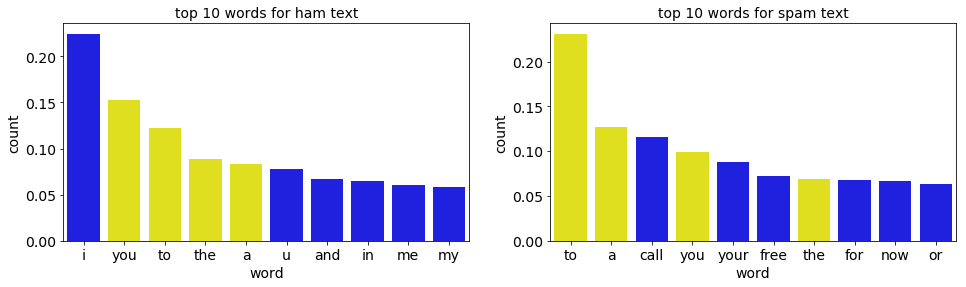

In [17]:

fig1,(ax1, ax2) = plt.subplots(1,2,figsize = (16,4))
sb.barplot(x = keys_ham, y = [x/sum(values_ham) for x in values_ham], ax = ax1, palette = ["yellow" if (x in intersect) else "blue" for x in keys_ham])
ax1.set_ylabel('count', fontsize = 14)
ax1.set_xlabel('word',fontsize = 14)
ax1.tick_params(labelsize=14)
ax1.set_title( 'top 10 words for ham text', fontsize = 14)
sb.barplot(x = keys_spam, y = [x/sum(values_spam) for x in values_spam], ax = ax2, palette = ["yellow" if (x in intersect) else "blue" for x in keys_spam])
ax2.set_ylabel('count', fontsize = 14)
ax2.set_xlabel('word',fontsize = 14)
ax2.tick_params(labelsize=14)
ax2.set_title('top 10 words for spam text', fontsize = 14)

As we can see here, if we don't remove stop words, the top 10 common words are pretty normal, which means those stop words are pretty predominant in email text that we would like to remove them and discover more important feature words. In both spam and ham text, words like "you", "to","a","the" are all very dominant and frequent So we could have reasonable assumption that the stop words dominate the text, both ham and spam. It would be pretty bad if we don't remove stop words since the difference between spam and ham would not be obvious and we could have awful model if we train on the word data without stop words.

In [18]:
n_spam = len(spam_list)
n_ham = len(ham_list)
print("the number of words in spam text without removing stop words is " +str(n_spam))
print("the number of words in ham text without removing stop words is " +str(n_ham))

the number of words in spam text without removing stop words is 16613
the number of words in ham text without removing stop words is 70160


In [19]:
new_stop_words = ["'s","'m","n't",'u','ur','lt',"'ll"]  ## I include words like u(same as you) into stopwords

In [20]:
spam_wo_stp= [word for word in spam_list if word not in set(stopwords.words('english'))]
spam_wo_stp = [word for word in spam_wo_stp if word not in new_stop_words]

In [21]:
ham_wo_stp =  [word for word in ham_list if word not in set(stopwords.words('english'))]
ham_wo_stp = [word for word in ham_wo_stp if word not in new_stop_words]

In [22]:
n_spam_wo_stp =len(spam_wo_stp)
n_ham_wo_stp = len(ham_wo_stp)
print("the number of words in spam text after removing stop words is " +str(n_spam_wo_stp))
print("the number of words in ham text after removing stop words is " +str(n_ham_wo_stp))

the number of words in spam text after removing stop words is 11039
the number of words in ham text after removing stop words is 37918


In [23]:
percent1 = round((1- n_spam_wo_stp/n_spam)*100,2)
percent2 = round((1- n_ham_wo_stp/n_ham)*100,2)

print("the percentage of stop words in spam text is " +str(percent1)+"%")
print("the percentage of stop words in ham text is " +str(percent2)+"%")

the percentage of stop words in spam text is 33.55%
the percentage of stop words in ham text is 45.95%


We could see that we validate that stop words take up a huge amount of percentage in our text, both in ham or spam text. It would be a good idea to remove them before we fit the model.  Below are bar plots of top ten frequentist except for those common words.

In [24]:
spam_count_wo_stp = Counter(spam_wo_stp).most_common(10)
ham_count_wo_stp = Counter(ham_wo_stp).most_common(10)

In [25]:
keys_spam = [x[0] for x in spam_count_wo_stp]
values_spam = [x[1] for x in spam_count_wo_stp]

keys_ham = [x[0] for x in ham_count_wo_stp]
values_ham = [x[1] for x in ham_count_wo_stp]

In [26]:
intersect2 = [x for x in keys_ham if x in keys_spam]
intersect2

['get', 'call']

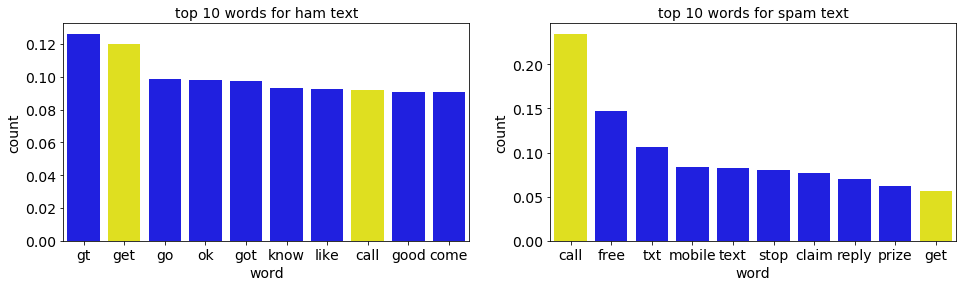

In [27]:
fig1,(ax1, ax2) = plt.subplots(1,2,figsize = (16,4))
sb.barplot(x = keys_ham, y = [x/sum(values_ham) for x in values_ham], ax = ax1, palette = ["yellow" if (x in intersect2) else "blue" for x in keys_ham])
ax1.set_ylabel('count', fontsize = 14)
ax1.set_xlabel('word',fontsize = 14)
ax1.tick_params(labelsize=14)
ax1.set_title( 'top 10 words for ham text', fontsize = 14)
sb.barplot(x = keys_spam, y = [x/sum(values_spam) for x in values_spam], ax = ax2, palette = ["yellow" if (x in intersect2) else "blue" for x in keys_spam])
ax2.set_ylabel('count', fontsize = 14)
ax2.set_xlabel('word',fontsize = 14)
ax2.tick_params(labelsize=14)
ax2.set_title('top 10 words for spam text', fontsize = 14)

Inside the ham text, colloquial words are more likely to appear, like "get", "know","ok","go" etc. In Spam text, "call", "free", "claim" appears frequently as they want to attract people with tempting ads.  The word "call" appears frequently in both ham and spam but it dominates spam text. Same thing happens on wrod "get". I assume "gt" and "get" should be the same words but in spam text won't use abbreviation. Also "got" should be same as"get", so the even though "get" appears frequently in both ham and spam but it dominates ham text. 

**Model Building and Prediction**

In [28]:
import nltk
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(text["text"],text["label"], 
                                                 test_size = 0.2, random_state = 10)

In [37]:
X_train.head()

5281               And how you will do that, princess? :)
1300    Great to hear you are settling well. So what's...
5128    Wot about on wed nite I am 3 then but only til 9!
1808      Do have a nice day today. I love you so dearly.
856     Talk sexy!! Make new friends or fall in love i...
Name: text, dtype: object

Tfidf Transformation: transform corpus in to sparse matrix of Tfidf values 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
v.fit_transform(X_train, y_train)

<4457x7728 sparse matrix of type '<class 'numpy.float64'>'
	with 59417 stored elements in Compressed Sparse Row format>

In [31]:
X_train_tf = v.transform(X_train)
X_test_tf = v.transform(X_test)

In [34]:
print(np.shape(X_train_tf))
print(np.shape(X_test_tf))

(4457, 7728)
(1115, 7728)


In [34]:
prediction = dict()

**1. Multinomial Naive Bayes**

In [35]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
prediction["Multinomial NB"] = model.predict(X_test_tf)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import itertools
from matplotlib import cm

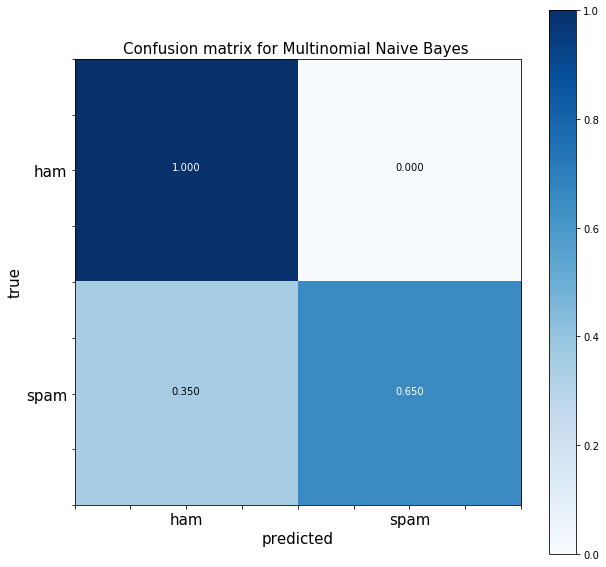

In [38]:
labels = ["ham","spam"]
cm_mnb=confusion_matrix(y_test, prediction["Multinomial NB"],labels)
cm_mnb = cm_mnb.astype('float') / cm_mnb.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.imshow(cm_mnb, interpolation='nearest', cmap=cm.Blues)
plt.title("Confusion matrix for Multinomial Naive Bayes ", fontsize = 15)
fig.colorbar(cax)
ax.set_xticklabels(['','','ham','','','','spam',''], fontsize = 15)
fmt = '.3f' 
thresh = cm_mnb.max() / 2.
for i, j in itertools.product(range(cm_mnb.shape[0]), range(cm_mnb.shape[1])):
        plt.text(j, i, format(cm_mnb[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_mnb[i, j] > thresh else "black")
ax.set_yticklabels(['','','ham','','','','spam',''], fontsize = 15)
plt.xlabel("predicted", fontsize = 15)
plt.ylabel("true", fontsize = 15)
plt.show()

In [39]:
print('\033[1m'+"Classification report for Multinomial NB"+'\033[0m')
print(classification_report(y_test, prediction["Multinomial NB"]))

Classification report for Multinomial NB
             precision    recall  f1-score   support

        ham       0.95      1.00      0.97       972
       spam       1.00      0.65      0.79       143

avg / total       0.96      0.96      0.95      1115



We could compare our confusion matrix with the classification report. The recall is true positive rate, which corresponds to the diagonal numbers in the confusion matrix. The recall for ham is 100% and the for spam is 65%. In the classification report.  weighted F1 score is 0.95, which is high. Multinomial Naive Bayes performs well in this case.



**2.SVM**

In [40]:
from sklearn.svm import SVC, NuSVC, LinearSVC

In [41]:
model_svc = LinearSVC()
model_svc.fit(X_train_tf, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [42]:
prediction["SVM"] = model_svc.predict(X_test_tf)


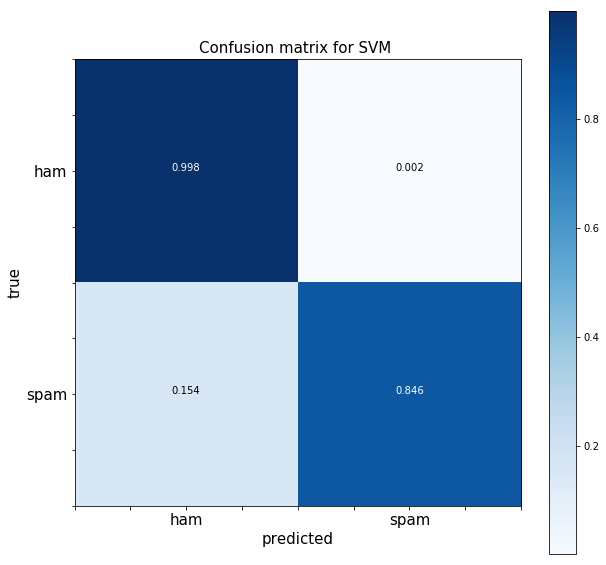

In [111]:
labels = ["ham","spam"]
cm_svm=confusion_matrix(y_test, prediction["SVM"],labels)
cm_svm = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.imshow(cm_svm, interpolation='nearest', cmap=cm.Blues)
plt.title("Confusion matrix for SVM ",fontsize = 15)
fig.colorbar(cax)
ax.set_xticklabels(['','','ham','','','','spam',''], fontsize = 15)
ax.set_yticklabels(['','','ham','','','','spam',''],fontsize = 15)
fmt = '.3f' 
thresh = cm_svm.max() / 2.
for i, j in itertools.product(range(cm_svm.shape[0]), range(cm_svm.shape[1])):
        plt.text(j, i, format(cm_svm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_svm[i, j] > thresh else "black")
plt.xlabel("predicted", fontsize = 15)
plt.ylabel("true",fontsize = 15)
plt.show()

In [44]:
print('\033[1m'+"Classification report for SVM"+'\033[0m')
print(classification_report(y_test, prediction["SVM"]))

Classification report for SVM
             precision    recall  f1-score   support

        ham       0.98      1.00      0.99       972
       spam       0.98      0.85      0.91       143

avg / total       0.98      0.98      0.98      1115



For SVM model, the recall for ham is 0.998, and for spam is 0.85. F1 score is 0.98. The recall for ham approximately the same with Multinomial Naive Bayes but the recall for spam is higher. So SVM is better than Multinomial naive bayes in this situation. (Ham has much more observations than spam so it is easier to obtain a better recall in ham than in spam.Thus, the high recall in spam would demonstrate better perfomance in prediction).

**3. Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
prediction["random forest"] = model_rf.predict(X_test_tf)
confusion_matrix(y_test, prediction["random forest"])

array([[972,   0],
       [ 38, 105]])

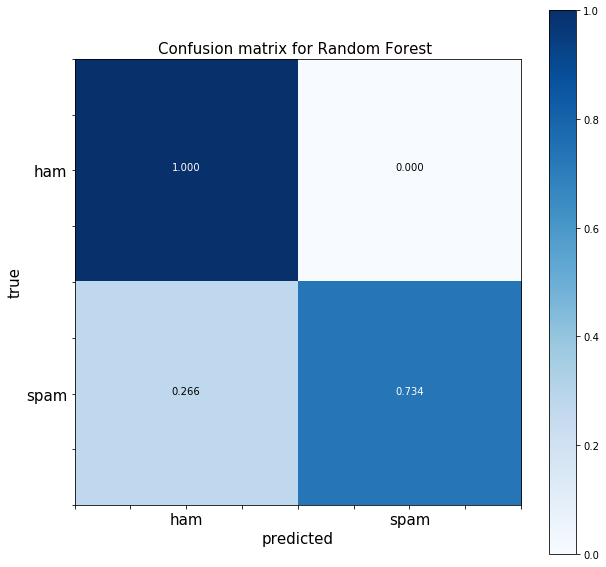

In [112]:
labels = ["ham","spam"]
cm_rf=confusion_matrix(y_test, prediction["random forest"],labels)

## Normalize the confusion matrix
cm_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.imshow(cm_rf, interpolation='nearest', cmap=cm.Blues)
plt.title("Confusion matrix for Random Forest ",fontsize = 15)
fig.colorbar(cax)
ax.set_xticklabels(['','','ham','','','','spam',''],fontsize =15)
ax.set_yticklabels(['','','ham','','','','spam',''],fontsize = 15)
fmt = '.3f' 
thresh = cm_rf.max() / 2.
for i, j in itertools.product(range(cm_rf.shape[0]), range(cm_rf.shape[1])):
        plt.text(j, i, format(cm_rf[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_rf[i, j] > thresh else "black")
plt.xlabel("predicted", fontsize = 15)
plt.ylabel("true", fontsize = 15)
plt.show()


In [48]:
print('\033[1m'+"Classification report for Random Forest"+'\033[0m')
print(classification_report(y_test, prediction["random forest"]))

Classification report for Random Forest
             precision    recall  f1-score   support

        ham       0.96      1.00      0.98       972
       spam       1.00      0.73      0.85       143

avg / total       0.97      0.97      0.96      1115



For random Forest Classifier, the recall for ham is 100% and for spam is 73%. The weighted f1 score is 0.96. It is better than Multinomial Naive Bayes but not as good as SVM.

**4. Light GBM**

In [49]:
import lightgbm as lgb

In [50]:
model_lgb = lgb.LGBMClassifier()

In [51]:
model_lgb

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [52]:
model_lgb.fit(X_train_tf, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [53]:
prediction["light GBM"] = model_lgb.predict(X_test_tf)
confusion_matrix(y_test, prediction["light GBM"])

array([[971,   1],
       [ 29, 114]])

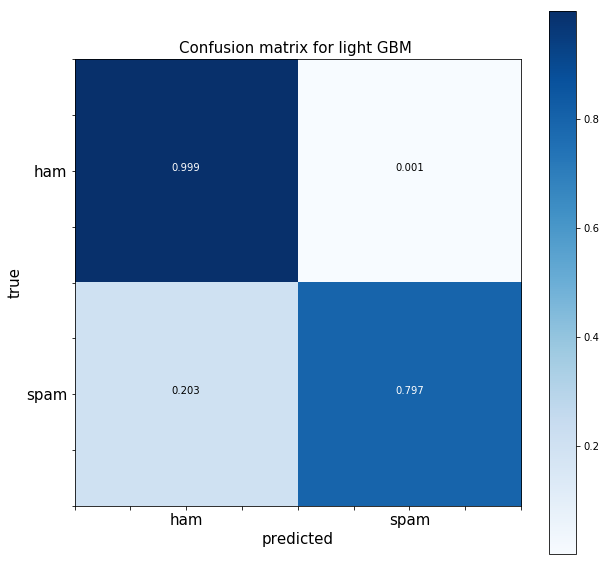

In [113]:
cm_gbm=confusion_matrix(y_test, prediction["light GBM"],labels)
cm_gbm = cm_gbm.astype('float') / cm_gbm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.imshow(cm_gbm, interpolation='nearest', cmap=cm.Blues)
plt.title("Confusion matrix for light GBM ",fontsize = 15)
fig.colorbar(cax)
ax.set_xticklabels(['','','ham','','','','spam',''],fontsize =15)
ax.set_yticklabels(['','','ham','','','','spam',''],fontsize = 15)
fmt = '.3f' 
thresh = cm_gbm.max() / 2.
for i, j in itertools.product(range(cm_gbm.shape[0]), range(cm_gbm.shape[1])):
        plt.text(j, i, format(cm_gbm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_gbm[i, j] > thresh else "black")
plt.xlabel("predicted",fontsize = 15)
plt.ylabel("true",fontsize = 15)
plt.show()

In [55]:
print('\033[1m'+"Classification report for Light GBM"+'\033[0m')
print(classification_report(y_test, prediction["light GBM"]))

Classification report for Light GBM
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98       972
       spam       0.99      0.80      0.88       143

avg / total       0.97      0.97      0.97      1115



For light GBM models, the weighted F1 score is 0.97. It's not as good as SVM but better than others

**5.K-NN Classifier **

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 6)
model_knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [57]:
prediction["knn"] = model_knn.predict(X_test_tf)
confusion_matrix(y_test, prediction["knn"])

array([[972,   0],
       [111,  32]])

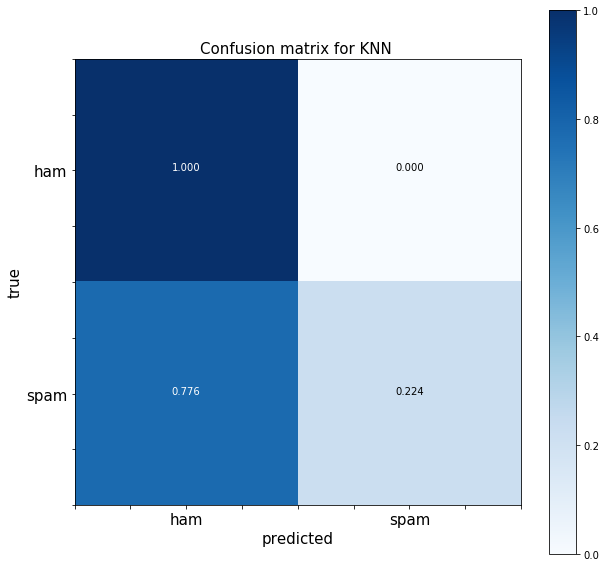

In [114]:
cm_knn=confusion_matrix(y_test, prediction["knn"],labels)
cm_knn = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.imshow(cm_knn, interpolation='nearest', cmap=cm.Blues)
plt.title("Confusion matrix for KNN ",fontsize = 15)
fig.colorbar(cax)
ax.set_xticklabels(['','','ham','','','','spam',''],fontsize = 15)
ax.set_yticklabels(['','','ham','','','','spam',''], fontsize = 15)
fmt = '.3f' 
thresh = cm_knn.max() / 2.
for i, j in itertools.product(range(cm_knn.shape[0]), range(cm_knn.shape[1])):
        plt.text(j, i, format(cm_knn[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_knn[i, j] > thresh else "black")
plt.xlabel("predicted",fontsize = 15)
plt.ylabel("true", fontsize = 15)
plt.show()

In [59]:
print('\033[1m'+"Classification report for KNN"+'\033[0m')
print(classification_report(y_test, prediction["knn"]))

Classification report for KNN
             precision    recall  f1-score   support

        ham       0.90      1.00      0.95       972
       spam       1.00      0.22      0.37       143

avg / total       0.91      0.90      0.87      1115



As we can see, the recall for spam is extremely low, which means most of true spams are being classified as ham in KNN. I try alter the number of nearest neigbor 

In [65]:
model_knn2 = KNeighborsClassifier(n_neighbors = 36)
model_knn2.fit(X_train_tf, y_train)
prediction["knn2"] = model_knn2.predict(X_test_tf)
confusion_matrix(y_test, prediction["knn2"])
print(classification_report(y_test, prediction["knn2"]))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97       972
       spam       1.00      0.62      0.76       143

avg / total       0.95      0.95      0.95      1115



It works better when adding the number of nearest neigborhood,which makes sense because adding number of neighborhood do improve accuracy, however,we have to be careful about underfitting. 

From my results, I found out that Support Vector Machine and Light GBM performs better than others, with both f1 score and precision larger than 0.97

To get a more general results on this specific dataset, I use cross validation 

**Cross Validation**

In [67]:
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import KFold

In [68]:
v_whole = TfidfVectorizer()
v_whole.fit_transform(text["text"], text["label"])
x = v_whole.transform(text["text"])
y_resp = text["label"]

model_mnb2 = MultinomialNB()
#model_mnb2.fit(x,y)


In [69]:
cross_val_score(estimator = model,X=x,y=y_resp, cv = 5).mean()

0.95890138554556348

In [70]:
cross_val_score(estimator = model_svc,X=x,y=y_resp, cv = 5).mean()

0.98133498643437389

In [71]:
cross_val_score(estimator = model_rf,X=x,y=y_resp, cv = 5).mean()

0.96984872515316689

In [72]:
cross_val_score(estimator = model_knn,X=x,y=y_resp, cv = 5).mean()

0.91852863272979035

In [74]:
cross_val_score(estimator = model_knn2,X=x,y=y_resp, cv = 5).mean()

0.95387654877587325

In [75]:
cross_val_score(estimator = model_lgb,X=x,y=y_resp, cv = 5).mean()

0.98223136437191561

Cross validation score validates our results above, SVM and light GBM works better than other models， we then want to plot learning curve to see if there are overfitting in our model.

In [76]:
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation

/Users/ruichen/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ruichen/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [77]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(8,8))
    plt.title(title, fontsize = 20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [78]:
np.shape(x)[0]

5572

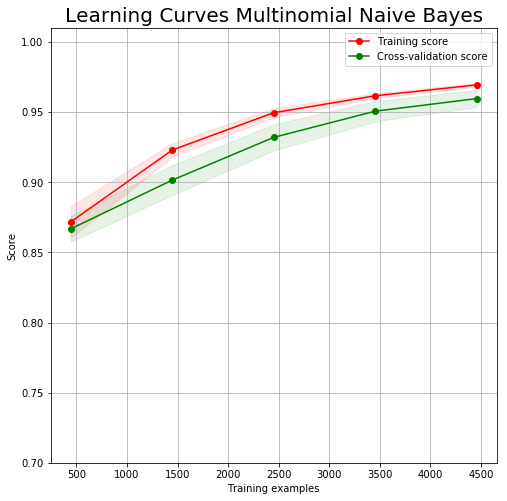

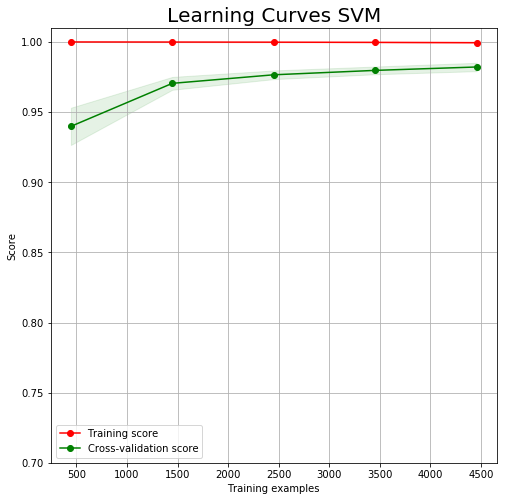

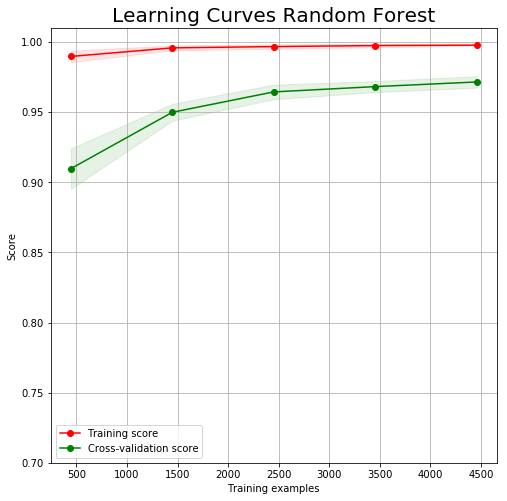

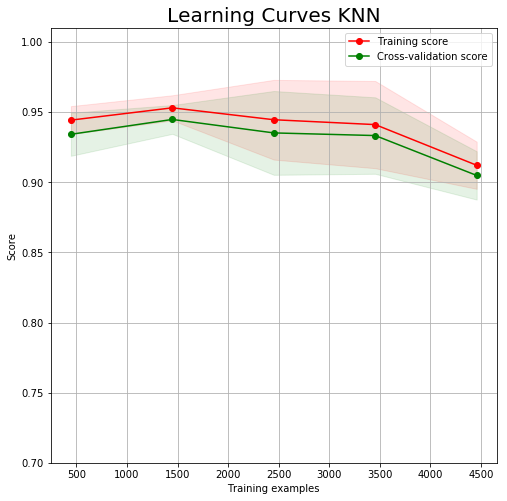

In [108]:
title = "Learning Curves Multinomial Naive Bayes"
cv = cross_validation.ShuffleSplit(np.shape(x)[0], n_iter=100,
                                   test_size=0.2, random_state=0)
plot_learning_curve(MultinomialNB(), title, x, y_resp, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves SVM"

cv = cross_validation.ShuffleSplit(np.shape(x)[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = LinearSVC()
plot_learning_curve(estimator, title, x, y_resp, (0.7, 1.01), cv=cv, n_jobs=4)
title = "Learning Curves Random Forest"

cv = cross_validation.ShuffleSplit(np.shape(x)[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator =RandomForestClassifier()
plot_learning_curve(estimator, title, x, y_resp, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves KNN"

cv = cross_validation.ShuffleSplit(np.shape(x)[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors = 6)
plot_learning_curve(estimator, title, x, y_resp, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

For Random Forest and SVM, it is a overfitting. For Knn and Multinomial Naive Bayes, even though training score is always higher than cross-validation score, the difference is not too much and training score is usually higher than cross-validation score. But KNN has a generally lower f1 and recall as well as precision score.  The learning curve for KNN model first increases then decreases in both training score and cross-validation score. KNN model is not robust here, the number of neighbors makes a huge difference to not only the learning curve, but also the precision and recall. Thus it contains more randomness than other models.When k is small,like here, the model is overfitting, but when I increase the k to 36, the model is underfitting. Thus I think KNN is not suitable here or we need to make modification either on the data or the model to make the model more robust. 


I would be very interested in learning curve of light GBM but it takes forever to plot the graph. 

**Limitation of the dataset** : This dataset is pretty imbalanced, thus when we evaluating the model, using only the accuracy_socre is not good. Since the dataset is imbalanced, it would be pretty easy to get a relatively high score, indicating less information. So we use confusion matrix and take recall precision and f1 score into consideration.

This dataset is not big either. It would be better if we have more observations, especially observations in spam.

**Improvement** : I think we could clean the language data more thouroughly next time, for example, remove the effect of tense and property, treating love, loved, beloved as the same. Also, expand the stop word list, because a lot of abbreviations nowadays haven't been included. For example ,"u" is same as "you". 

Parameter inside the function should also be altered to achieve a better results, like the number of trees in RandomForest, the learning rate in light GBM, number of nearest neighbors in knn, etc.